In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata


# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a **customer transaction in a certain mall**. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from **Elearn**

In [3]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/WilliamKesuma/Data-Mining/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df = df.rename(columns={"Annual Income (k$)": "AnnualIncome"})
df = df.rename(columns={"Spending Score (1-100)": "SpendingScore"})
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
# describe data
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
# Check for null values in the dataset
df.isnull().sum()

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

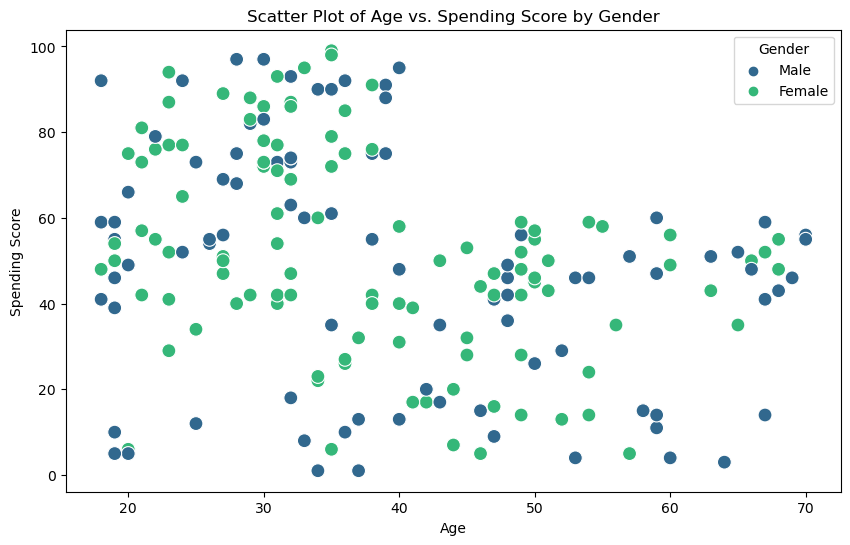

In [13]:
# make an insightful visualization and explain
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Age", y="SpendingScore", hue="Gender", s=100, palette="viridis")
plt.title("Scatter Plot of Age vs. Spending Score by Gender")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.legend(title="Gender")
plt.show()

A scatter plot can reveal how spending score varies with age while differentiating by gender. By adding a color hue based on gender, we can identify if one gender has higher spending scores or if certain age groups tend to spend more.

Explanation:
X-axis: Age
Y-axis: Spending Score
Color Hue: Gender
This visualization will allow you to see if spending patterns vary by gender across different ages. If the data shows that younger people or a specific gender has higher spending scores, it could be useful for targeted marketing strategies.

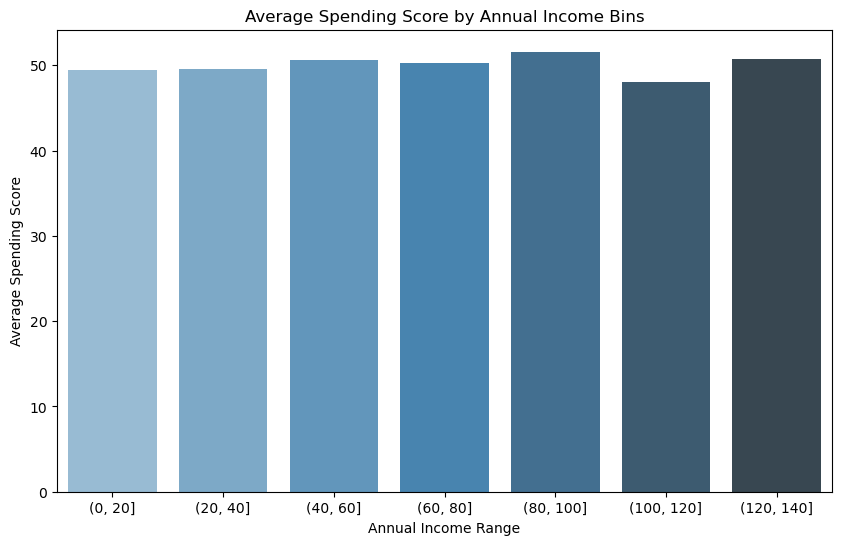

In [14]:
# make an insightful visualization and explain
income_bins = pd.cut(df['AnnualIncome'], bins=[0, 20, 40, 60, 80, 100, 120, 140])
income_avg_spending = df.groupby(income_bins)['SpendingScore'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=income_avg_spending['AnnualIncome'], y=income_avg_spending['SpendingScore'], palette="Blues_d")
plt.title("Average Spending Score by Annual Income Bins")
plt.xlabel("Annual Income Range")
plt.ylabel("Average Spending Score")
plt.show()

 bar plot with bins for annual income (e.g., income ranges) and the average spending score within each range can show how income correlates with spending behavior.

Explanation:
X-axis: Binned Annual Income ranges (e.g., 10-20, 20-30, etc.)
Y-axis: Average Spending Score for each income range
This chart will highlight any patterns between income levels and spending habits, allowing insights into how spending score changes as income increases or if certain income brackets are more inclined to spend. This can inform income-targeted strategies or discounts.

## Data Preprocessing

For this case study, we only use income and spending score

In [23]:
# create new dataframe that consist only annual income and spending score
df_income_spending = df[['AnnualIncome', 'SpendingScore']]
df_income_spending.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [24]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the 'AnnualIncome' and 'SpendingScore' columns
df_income_spending_scaled = scaler.fit_transform(df_income_spending)

# Convert the scaled data back to a DataFrame for easier readability
df_income_spending_scaled = pd.DataFrame(df_income_spending_scaled, columns=['AnnualIncome', 'SpendingScore'])

# Display the first few rows of the scaled dataframe
df_income_spending_scaled.head()

,AnnualIncome,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [25]:
# get stastical information on the new dataset
df_income_spending_scaled.describe()

,AnnualIncome,SpendingScore
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

Before scaling

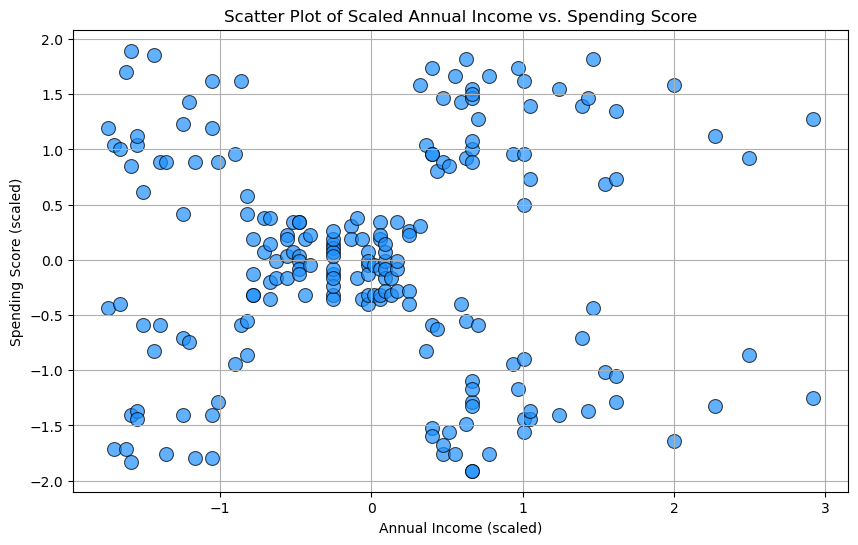

In [21]:
# Visualize the position
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_income_spending_scaled['AnnualIncome'],
    y=df_income_spending_scaled['SpendingScore'],
    s=100, color="dodgerblue", edgecolor="black", alpha=0.7
)
plt.title("Scatter Plot of Scaled Annual Income vs. Spending Score")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.grid(True)
plt.show()

After Scaling

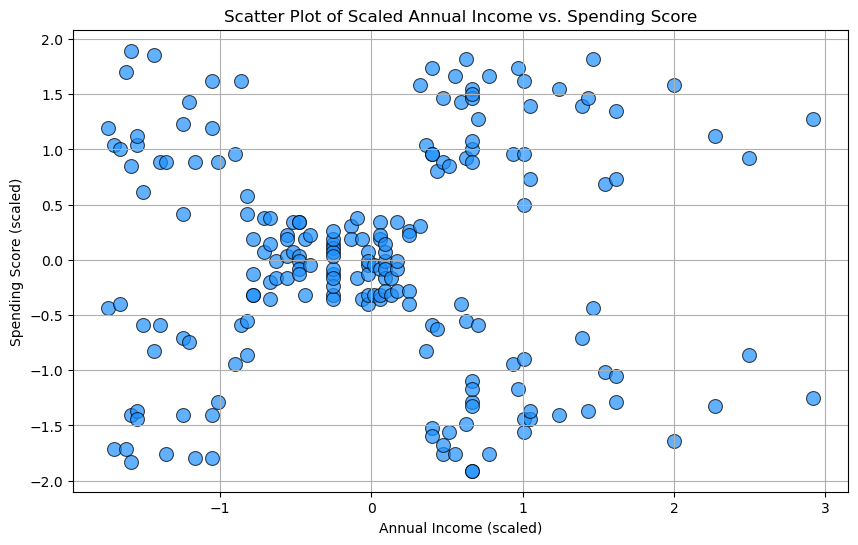

In [26]:
# Visualize the position 
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_income_spending_scaled['AnnualIncome'],
    y=df_income_spending_scaled['SpendingScore'],
    s=100, color="dodgerblue", edgecolor="black", alpha=0.7
)
plt.title("Scatter Plot of Scaled Annual Income vs. Spending Score")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.grid(True)
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [29]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define range for K
k_range = range(1, 11)

# Initialize a list to store the inertia (within-cluster sum of squares) for each K
inertia = []

# Apply KMeans with different K values
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='random', max_iter=300, random_state=42)
    kmeans.fit(df_income_spending_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\willi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\willi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\willi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\willi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

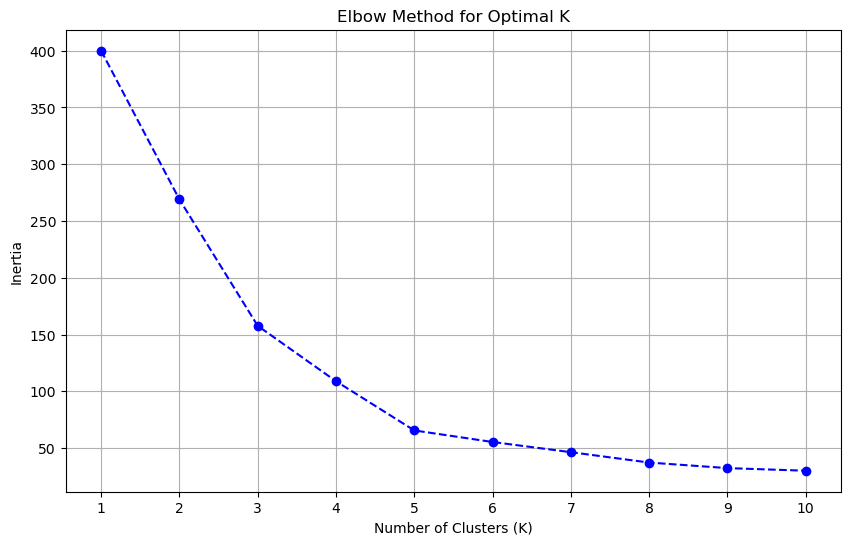

In [30]:
# manually visualize the elbow method using plotlib
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [32]:
# using kneelocator to find the elbow/knee
print(f"The optimal number of clusters (K) is: {optimal_k}")

The optimal number of clusters (K) is: 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [34]:
# assign cluster with K-Means algorithm
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df_income_spending)
y_pred

C:\Users\willi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\willi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

Visualize your result based on income and spending. You also can show the final position of the centroid.

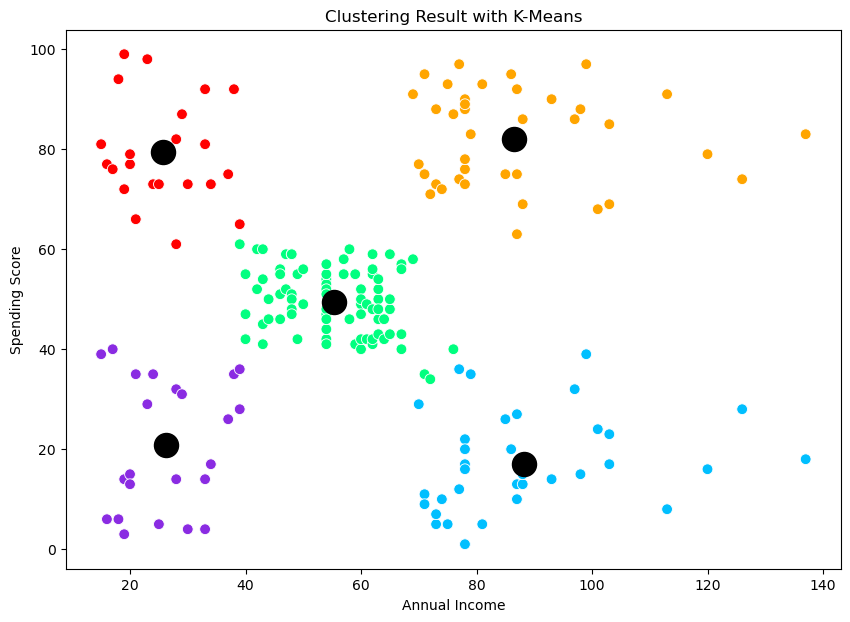

In [36]:
# visualize the result using scater chart
plt.figure(figsize=(10,7))

sns.scatterplot(x = "AnnualIncome", y="SpendingScore", hue=y_pred, palette=["blueviolet", "red", "deepskyblue", "orange", "springgreen"], legend =  None, data = df_income_spending, s= 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Clustering Result with K-Means")
plt.show()

In [39]:
# Inverse transform the scaled data to get the original values
df_income_spending = pd.DataFrame(scaler.inverse_transform(df_income_spending), columns = ["AnnualIncome", "SpendingScore"])
df_income_spending['Cluster'] = y_pred
df_income_spending.head()

,AnnualIncome,SpendingScore,Cluster
0,453.544656,1054.796397,0
1,453.544656,2136.669439,1
2,479.743633,204.753292,0
3,479.743633,2033.633911,1
4,505.942610,1080.555279,0


In [40]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df_income_spending.groupby(y_pred).agg({'SpendingScore': ['mean', 'std', 'min', 'max'], 'AnnualIncome': ['mean', 'std', 'min', 'max']})
cluster_summary = cluster_summary.rename_axis('cluster')
cluster_summary

SpendingScore                                       AnnualIncome  \
                 mean         std          min          max         mean   
cluster                                                                    
0          588.896618  335.307672   127.476646  1080.555279   749.707006   
1         2094.518541  270.575767  1621.491800  2600.329314   734.588228   
2          491.044866  256.356372    75.958882  1054.796397  2371.309778   
3         2165.730742  241.218771  1673.009564  2548.811550  2327.779170   
4         1325.741674  168.228925   926.001987  1621.491800  1509.266399   

                                               
                std          min          max  
cluster                                        
0        206.809775   453.544656  1082.320106  
1        198.240600   453.544656  1082.320106  
2        429.638791  1894.488396  3649.819860  
3        427.370420  1868.289418  3649.819860  
4        235.479273  1082.320106  2051.682258

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

Cluster 0
Spending Score: Low
Annual Income: Low
Interpretation: This group consists of customers with both low spending scores and low annual incomes. They are likely individuals with limited budgets.

Cluster 1
Spending Score: High
Annual Income: Low
Interpretation: These customers spend more than Cluster 0, despite having a lower income. They might have specific product preferences that lead them to spend more.

Cluster 2
Spending Score: Very Low
Annual Income: Very High
Interpretation: This group has high incomes but spends very little, possibly on luxury items or due to a preference for being selective with their purchases.

Cluster 3
Spending Score: High
Annual Income: High
Interpretation: This cluster represents the mall's ideal target customers. They have both high incomes and are willing to spend generously.

Cluster 4
Spending Score: Moderate
Annual Income: Moderate
Interpretation: These customers are regular shoppers with a balanced spending and income profile.
Recommendations for the Company:

Target Cluster 3 for premium products and high-end services, as they are likely to invest in these offerings.
Target Cluster 1 for niche or specialized products that align with their unique preferences.
Target Cluster 0 with discounts or loyalty programs to entice them to spend more.
Target Cluster 2 with exclusive, luxury products, catering to their selective spending habits.
Target Cluster 4 with product bundles or loyalty incentives, offering value while maintaining a balanced approach.


<write here>